In [1]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymongo
import pandas as pd
import re
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_APP_GOOGLE = db['TRAVEL_APPLICATION']
collection_APP_APPLE = db['TRAVEL_APPLICATION_APPLE']

data_APP_GOOGLE = collection_APP_GOOGLE.find()
data_APP_APPLE = collection_APP_APPLE.find()

df_APP_GOOGLE = pd.DataFrame(data_APP_GOOGLE)
df_APP_APPLE = pd.DataFrame(data_APP_APPLE)

In [3]:
from mecab import MeCab
mecab = MeCab()

# APP_GOOGLE & df_APP_APPLE 키워드(명사 형태소) 추출

In [4]:
df_APP_GOOGLE

,_id,app_name,user_score,user_date,user_comments,evaluation
0,662f099973f7ce16925e6b4e,tripadvisor,4,2019년 5월 13일,낯선 여행지에서 맞든 틀리든 이런 가이드가 있다는 것은 많은 도움이 됩니다. 때론 ...,73
1,662f099973f7ce16925e6b4f,tripadvisor,2,2019년 12월 16일,웹사이트에서 구글로 로긴하고 예약한다음 메일에 티켓 다운로드하기가 있길래 폰에서 앱...,59
2,662f099a73f7ce16925e6b50,tripadvisor,1,2020년 3월 20일,최근 업데이트후 실시간 항공권 가격이 낚시성 가격으로 나오고 결제는 실제로 되지 않...,60
3,662f099a73f7ce16925e6b51,tripadvisor,4,2019년 5월 13일,여행전 항상 여행정보를 위해 열어보는 앱입니다. 숙소및 식당은 물론이거니와 들러볼만...,8
4,662f099a73f7ce16925e6b52,tripadvisor,5,2019년 5월 19일,"다양한 콘텐츠와 뷰, 리뷰가 잘 어울어진 어플. 하지만, 지극히 여행자 중심의 결과...",14
...,...,...,...,...,...,...
15746,662f187a61d9aa4564c07af8,skyscanner,5,2015년 10월 10일,긋긋,
15747,662f187a61d9aa4564c07af9,skyscanner,3,2019년 5월 10일,good,
15748,662f187a61d9aa4564c07afa,skyscanner,5,2017년 4월 28일,와우,
15749,662f187b61d9aa4564c07afb,skyscanner,5,2015년 11월 6일,Good,


In [5]:
df_APP_APPLE

,_id,app_name,user_score,user_date,user_comments,evaluation
0,662f3b5534754d6a9687242b,tripadvisor,5,2024-03-12T20:54:05-07:00,시설도 너무 깨끗하고 룸청소 컨디션 모두 만족해요~\n골프여행으로 잡은 객실이였는데...,0
1,662f3b5534754d6a9687242c,tripadvisor,5,2024-02-05T17:48:09-07:00,처음부터 끝까지 최선을 다하는 운전 기사의 모습이 감동 이였습니다\n 동료가 병원에...,0
2,662f3b5534754d6a9687242d,tripadvisor,5,2023-11-29T01:17:22-07:00,일몰시간에 맞춰 방분한 부코 씨 사이드 식당입니다\n친절힌 서비스에 환상적인 사진뷰...,0
3,662f3b5534754d6a9687242e,tripadvisor,5,2023-11-02T03:37:51-07:00,"의외의 맛집입니다. 가족여행이고, 예민 사춘기 딸들이 지저분한 건 질색이라서, 에어...",0
4,662f3b5534754d6a9687242f,tripadvisor,5,2023-09-08T16:48:24-07:00,뉴욕에서 일주일 너무 좋았어요!,0
...,...,...,...,...,...,...
1995,662f3b7634754d6a96872bf6,skyscanner,3,2019-05-07T01:52:21-07:00,국내선 검색하니까 에어부산은 있길래 저가항공 다 나올줄알고 매번 검색해도 항상 에어...,0
1996,662f3b7634754d6a96872bf7,skyscanner,5,2019-05-06T21:00:13-07:00,스카이팀도 핵좋음,0
1997,662f3b7634754d6a96872bf8,skyscanner,3,2019-05-06T08:59:36-07:00,카카오톡으로 공유하기가 안됨\n최신버전의 앱 아니라고만 나옴 \n스카이스캐너가 업데...,0
1998,662f3b7634754d6a96872bf9,skyscanner,5,2019-05-05T17:41:07-07:00,잘이용하고있습니다. 신속하고 좋은 정보 항상 감사^^,0


In [6]:
# app(google, apple) 데이터를 concat 진행
df_app = pd.concat([df_APP_GOOGLE, df_APP_APPLE], ignore_index=True)
df_app

,_id,app_name,user_score,user_date,user_comments,evaluation
0,662f099973f7ce16925e6b4e,tripadvisor,4,2019년 5월 13일,낯선 여행지에서 맞든 틀리든 이런 가이드가 있다는 것은 많은 도움이 됩니다. 때론 ...,73
1,662f099973f7ce16925e6b4f,tripadvisor,2,2019년 12월 16일,웹사이트에서 구글로 로긴하고 예약한다음 메일에 티켓 다운로드하기가 있길래 폰에서 앱...,59
2,662f099a73f7ce16925e6b50,tripadvisor,1,2020년 3월 20일,최근 업데이트후 실시간 항공권 가격이 낚시성 가격으로 나오고 결제는 실제로 되지 않...,60
3,662f099a73f7ce16925e6b51,tripadvisor,4,2019년 5월 13일,여행전 항상 여행정보를 위해 열어보는 앱입니다. 숙소및 식당은 물론이거니와 들러볼만...,8
4,662f099a73f7ce16925e6b52,tripadvisor,5,2019년 5월 19일,"다양한 콘텐츠와 뷰, 리뷰가 잘 어울어진 어플. 하지만, 지극히 여행자 중심의 결과...",14
...,...,...,...,...,...,...
17746,662f3b7634754d6a96872bf6,skyscanner,3,2019-05-07T01:52:21-07:00,국내선 검색하니까 에어부산은 있길래 저가항공 다 나올줄알고 매번 검색해도 항상 에어...,0
17747,662f3b7634754d6a96872bf7,skyscanner,5,2019-05-06T21:00:13-07:00,스카이팀도 핵좋음,0
17748,662f3b7634754d6a96872bf8,skyscanner,3,2019-05-06T08:59:36-07:00,카카오톡으로 공유하기가 안됨\n최신버전의 앱 아니라고만 나옴 \n스카이스캐너가 업데...,0
17749,662f3b7634754d6a96872bf9,skyscanner,5,2019-05-05T17:41:07-07:00,잘이용하고있습니다. 신속하고 좋은 정보 항상 감사^^,0


In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
# 조사, 어미 구두점 같은 것을 제거 함수 / 나중에 불용어 처리 함수도 작성해주는 것이 좋음
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [9]:
df_app['user_comments_clean'] = df_app['user_comments'].apply(okt_clean)

In [10]:
df_app[:10]

,_id,app_name,user_score,user_date,user_comments,evaluation,user_comments_clean
0,662f099973f7ce16925e6b4e,tripadvisor,4,2019년 5월 13일,낯선 여행지에서 맞든 틀리든 이런 가이드가 있다는 것은 많은 도움이 됩니다. 때론 ...,73,낯선 여행지 맞다 틀리다 이렇다 가이드 있다 것 많다 도움 되다 때론 기대하다 않다...
1,662f099973f7ce16925e6b4f,tripadvisor,2,2019년 12월 16일,웹사이트에서 구글로 로긴하고 예약한다음 메일에 티켓 다운로드하기가 있길래 폰에서 앱...,59,웹사이트 구글 로 기다 예 약 한 다음 메일 티켓 다운로드 하다 있다 폰 앱 다운로...
2,662f099a73f7ce16925e6b50,tripadvisor,1,2020년 3월 20일,최근 업데이트후 실시간 항공권 가격이 낚시성 가격으로 나오고 결제는 실제로 되지 않...,60,최근 업데이트 후 실시간 항공권 가격 낚시 성 가격 나오다 결제 실제 되다 않다 경...
3,662f099a73f7ce16925e6b51,tripadvisor,4,2019년 5월 13일,여행전 항상 여행정보를 위해 열어보는 앱입니다. 숙소및 식당은 물론이거니와 들러볼만...,8,여 행전 항상 여행 정보 위해 열 어보 앱 이다 숙소 및 식당 물론 이다 들다 볼 ...
4,662f099a73f7ce16925e6b52,tripadvisor,5,2019년 5월 19일,"다양한 콘텐츠와 뷰, 리뷰가 잘 어울어진 어플. 하지만, 지극히 여행자 중심의 결과...",14,다양하다 콘텐츠 뷰 리뷰 자다 어 울다 어플 하지만 지극히 여행자 중심 결과 로컬 ...
5,662f099a73f7ce16925e6b53,tripadvisor,5,2019년 2월 16일,여행갈때마다 이용하는데 계획 세울때 유용하게 썼습니다. 자세한 정보는 없지만 지역마...,25,여행 갈다 때 이용 하다 계획 세 울 때 유용하다 써다 자세하다 정보 없다 지역 랜...
6,662f099a73f7ce16925e6b54,tripadvisor,4,2019년 1월 30일,여행지에 대한 대강의 인포메이션을 제공함. 아예 모르는 곳에 간다면 무척 도움이 크...,7,여행지 대한 대강 인포 메이 션 제 공함 아예 모르다 곳 간다 무척 도움 크게 되다...
7,662f099a73f7ce16925e6b55,tripadvisor,4,2020년 1월 28일,재체로 편리한 기능이.많고 다른 사람의 여행경험을 공유하여 여행시 도움이 됩니다. ...,6,재체 편리하다 기능 많다 다른 사람 여행 경험 공유 하다 여 행시 도움 되다 하지만...
8,662f099a73f7ce16925e6b56,tripadvisor,4,2019년 7월 14일,여러 여행장소와 액티비티에 대한 의견을 모아보기에 좋습니다. 다만 앱의 안정성은 약...,12,여러 여행 장소 액 티비 티 대한 의견 모으다 보기 좋다 다만 앱 안정 성은 약간 ...
9,662f099a73f7ce16925e6b57,tripadvisor,5,2018년 9월 18일,일단 이어플 정말 편리하고 유용합니다!! 좋네요!! 그리고 요새 네이버에 하태픽 검...,9,일단 이 어플 정말 편리하다 유용하다 좋다 그리고 요새 네이버 하태픽 검색 하다 적...


In [11]:
app_list_text = df_app["user_comments"].to_list()
# app_list_text_without_emoji = [re.sub(r'[^\w\s]', '', text) for text in app_list_text]
# app_list_text_result = [mecab.nouns(text) for text in app_list_text_without_emoji]
# app_list_text_result
app_list_text

['낯선 여행지에서 맞든 틀리든 이런 가이드가 있다는 것은 많은 도움이 됩니다. 때론 기대하지 않았던 정보도 얻을 수 있습니다. 정보의 정확성을 기하기 위해 여기에서 추천한 공을 다른 방법으로 검색해보면 어느 정도 유추가 가능해집니다. 여행 때마다 요긴하게 활용합니다.',
 '웹사이트에서 구글로 로긴하고 예약한다음 메일에 티켓 다운로드하기가 있길래 폰에서 앱을 다운로드하고 같은 구글 계정으로 로그인 햇는데 예약 사항을 전혀 확인할수 없고 티켓조차 앱으로 열리지 않음 메일에서 예약 상세보기 하려다가 잘못 눌러서 취소하기 눌러서 바로 예약이 취소되버렸음 취소할거냐고 확인조차 하지 않고 바로 취소되버려서 너무 황당함... 시즌이라 액티비티 예약마감 다찼고 내가 예약했던 날짜도 다시 예약이 안되는 상황임. 문의메일보내고 기다리는 중인데 너무 짜증남 트립어드바이저 자체 서비스는 좋은데 이 앱과 웹 연동이 잘 안되는듯 앱에서 내가 예약한 엑티비티는 추천 목록에서 볼려고 누르기만 해도 자꾸 오류난다고 로드도 안됨',
 '최근 업데이트후 실시간 항공권 가격이 낚시성 가격으로 나오고 결제는 실제로 되지 않는 경우가 많아져 실망했음.. 최저가 업체 클릭시 업체가 제공된 항공권 가격은 사라지고 다시 검색하라며 클릭 유도함... 거지 같이 업데이트 되어서 정말 실망함. 그동안 몇 번 잘 사용 한건 고맙게 생각합니다. 쿠키와 개인정보 활용으로 갑자기 해외 업체에서 전화와서 비행기표 직접 예약 해주겠다는 새끼도 있었습니다. 조심하세요.',
 '여행전 항상 여행정보를 위해 열어보는 앱입니다. 숙소및 식당은 물론이거니와 들러볼만한 랜드마크등에 대한 정보를 확인하고 계획을 잡는데 큰 도움이 되고 있어요. but, 단점은 별로 정보가 없어서 종종 아쉬움이 남기도 합니다.',
 '다양한 콘텐츠와 뷰, 리뷰가 잘 어울어진 어플. 하지만, 지극히 여행자 중심의 결과라 로컬의 맛집과 시설을 별도로 필터링 할수 있는 기능이 추가되면 좋을듯 함.',
 '여행갈때마다 이용하는데 계획 세울때 유용하게 썼습

# 시각화 작업

In [12]:
from collections import Counter
app_list = Counter(app_list_text)

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_frequencies(app_list)  # 기존 text를 집어넣고 교육

In [15]:
app_list_10 = dict(app_list.most_common(10))
app_list_10

{'좋아요': 776,
 '굿': 471,
 'good': 161,
 'Good': 144,
 '굳': 127,
 '좋음': 107,
 '좋네요': 65,
 '최고': 64,
 '좋습니다': 62,
 '굿굿': 58}

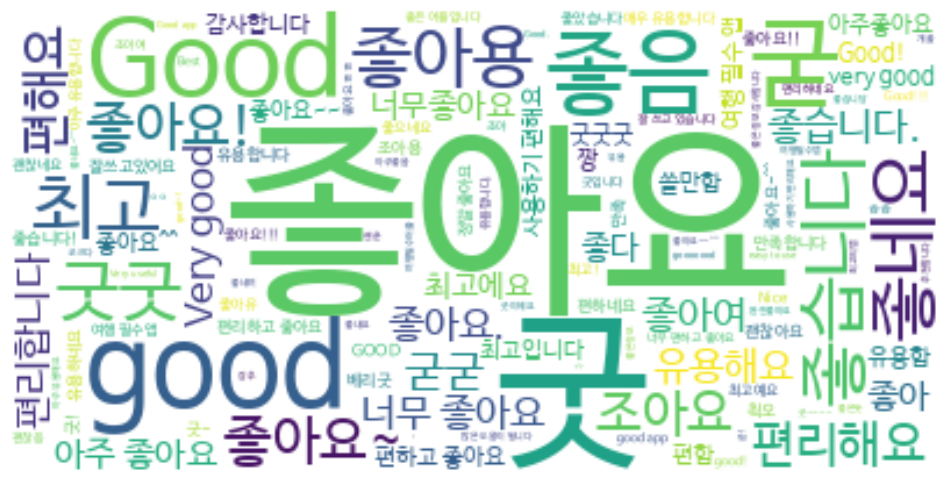

{'좋아요': 776, '굿': 471, 'good': 161, 'Good': 144, '굳': 127, '좋음': 107, '좋네요': 65, '최고': 64, '좋습니다': 62, '굿굿': 58}


In [16]:
import matplotlib.pyplot as plt
# plt.imshow(wordcloud)
# plt.axis("off") #x,y축 범례를 없애줌
# plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(app_list_10)

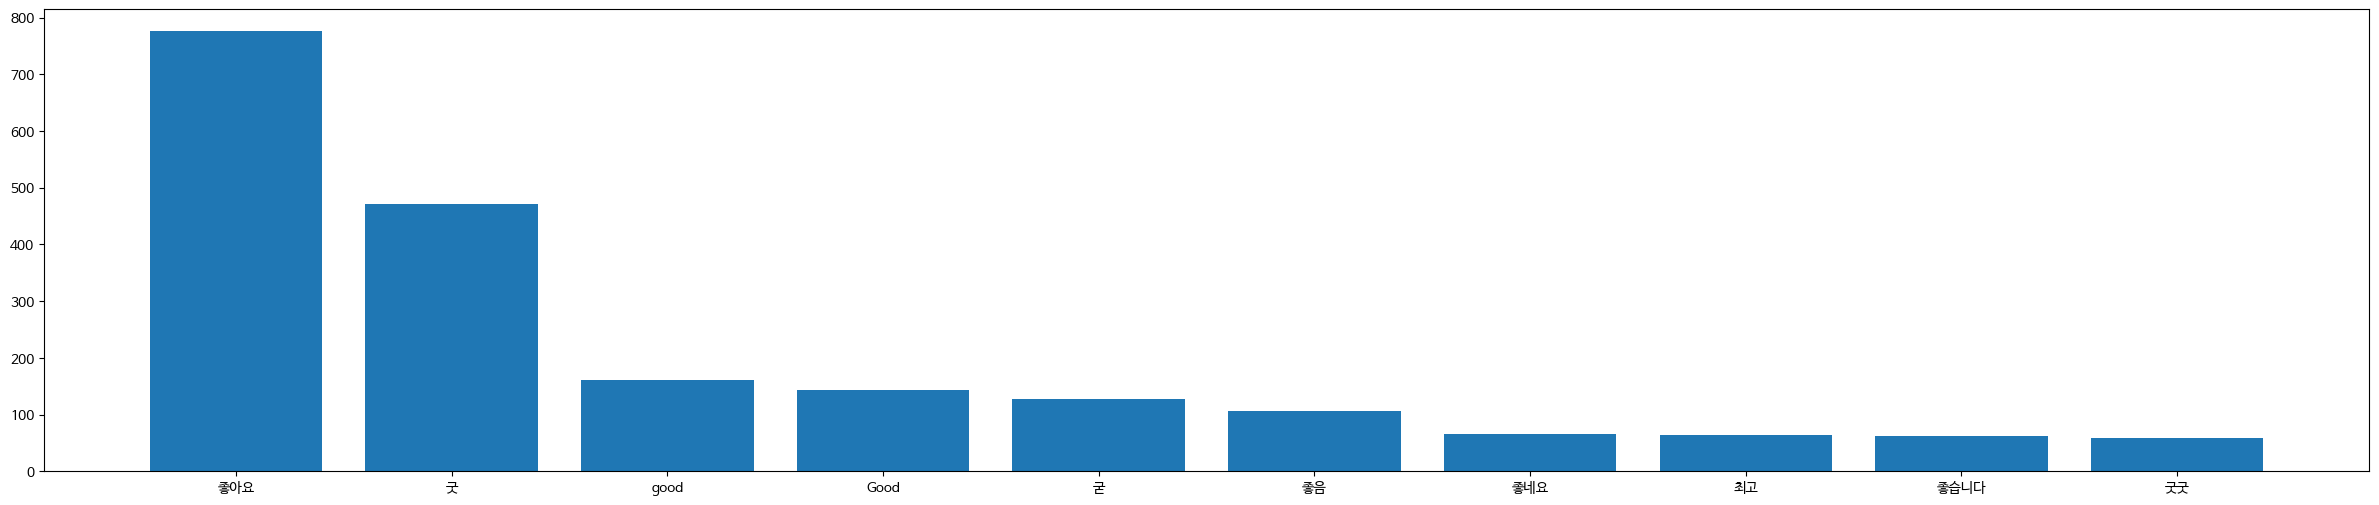

In [17]:
## app 키워드 분포
labels = app_list_10.keys()
values = app_list_10.values()
plt.figure(figsize=(30, 6))
plt.bar(labels, values)
plt.show()

In [18]:
# 예시 1안
# 비슷한 단어는 합쳐야 할듯
# 긍정 / 부정 으로 나눠서 진행해야할듯